<a href="https://colab.research.google.com/github/NorrisPau/MachineLearning_Class_NoraPauelsen/blob/main/BERT_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')
root_path = "/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Read in Data

In [ ]:
!pip install bertopic

In [56]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
import matplotlib as plt
import nltk
nltk.download('stopwords')
from bertopic import BERTopic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
raw_data = pd.read_csv("/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien/data/raw/okcupid_profiles.csv")

In [51]:
#Extract essay 0 (about me) to a list
df = raw_data[raw_data.essay0.notnull()]
essay_0_lst = list(df["essay0"]) #Make dataset to list

AttributeError: ignored

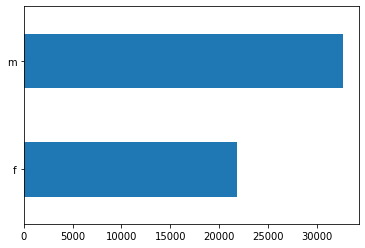

In [59]:
#Visualize the class distribution of female/male
df["sex"].value_counts(ascending=True).plot.barh()
#plt.title("Frequency of Gender")
plt.show()
#We see that we have more male profile texts than female

In [61]:
type(df["essay0"])

pandas.core.series.Series

AttributeError: ignored

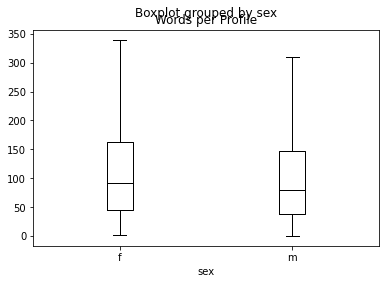

In [63]:
#How long are the profile texts?
df["Words per Profile"] = df["essay0"].str.split().apply(len)
df.boxplot("Words per Profile", by="sex", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()
#Very similar lengths from 50-150 words per profile text, female have a slightly higher average

In [64]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word.lower() not in stopwords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

In [65]:
essay_0_lst_stop = remove_stopwords(essay_0_lst)

In [66]:
essay_0_lst_stop[0:5]

["me: would love think kind intellectual: either dumbest smart guy, smartest dumb guy. can't say tell difference. love talk ideas concepts. forge odd metaphors instead reciting cliches. like simularities friend mine's house underwater salt mine. favorite word salt way (weird choice know). things life better metaphors. seek make little better everyday, productively lazy way. got tired tying shoes. considered hiring five year old, would probably tie shoes... decided wear leather shoes dress shoes. you: love really serious, really deep conversations really silly stuff. willing snap light hearted rant kiss. funny, able make laugh. able bend spoons mind, telepathically make smile still work. love life, cool letting wind blow. extra points reading guessing favorite video game (no hints given yet). lastly good attention span.",
 "chef: means. 1. workaholic. 2. love cook regardless whether work. 3. love drink eat foods probably really bad me. 4. love around people resemble line 1-3. love outdo

# Get topic probabilities 

In [67]:
# create model
topic_model = BERTopic(top_n_words=20, language="english", calculate_probabilities=True, verbose=True)

In [68]:
topics, probs = topic_model.fit_transform(essay_0_lst_stop)

Batches:   0%|          | 0/1702 [00:00<?, ?it/s]

2022-05-23 18:23:10,570 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-05-23 18:24:42,300 - BERTopic - Reduced dimensionality
2022-05-23 18:27:27,446 - BERTopic - Clustered reduced embeddings


In [71]:
# Look at highest topic per gender
len(probs)
len(df["sex"]) #54458
len(topics) #54458
plt.bar()

54458

In [74]:
topics[0:5]

[-1, 44, -1, -1, -1]

In [75]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name
0,-1,41272,-1_im_love_like_life
1,0,813,0_queer_poly_sex_gay
2,1,649,1_hiking_camping_outdoors_enjoy
3,2,477,2_born_moved_school_raised
4,3,448,3_loyal_adventurous_smart_funny
5,4,444,4_nerd_geek_nerdy_games
6,5,415,5_dating_online_site_date
7,6,382,6_think_im_one_like
8,7,334,7_trip_travel_europe_america
9,8,306,8_moved_sf_city_san


In [77]:
sex = list(df["sex"])

In [78]:
len(sex)

54458

In [79]:
topics_per_class = topic_model.topics_per_class(essay_0_lst_stop, topics, classes=sex)

2it [00:03,  1.57s/it]


In [81]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=50, width=900)